In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


It consists of 10000 observations and 14 variables. Independent variables 
contain information about customers. Dependent variable refers to customer 
abandonment status.
- RowNumber — Corresponds to the record (row) number and has no effect 
on the output. This column will be removed.
- CustomerId — Contains random values and has no effect on customer 
leaving the bank. This column will be removed.
- Surname — The surname of a customer has no impact on their decision to 
leave the bank. This column will be removed.
- CreditScore — Can have an effect on customer churn, since a customer 
with a higher credit score is less likely to leave the bank.
- Geography — A customer’s location can affect their decision to leave the 
bank. We’ll keep this column.
- Gender — It’s interesting to explore whether gender plays a role in a 
customer leaving the bank. We’ll include this column, too.
- Age — This is certainly relevant, since older customers are less likely to 
leave their bank than younger ones.
- Tenure — Refers to the number of years that the customer has been a 
client of the bank. Normally, older clients are more loyal and less likely to 
leave a bank.
- Balance —As people with a higher balance in their accounts are less likely 
to leave the bank compared to those with lower balances.
- NumOfProducts — Refers to the number of products that a customer has 
purchased through the bank.
- HasCrCard — Denotes whether or not a customer has a credit card. This 
column is also relevant, since people with a credit card are less likely to 
leave the bank. (0=No,1=Yes)
- IsActiveMember — Active customers are less likely to leave the bank, so 
we’ll keep this. (0=No,1=Yes)
- EstimatedSalary — As with balance, people with lower salaries are more 
likely to leave the bank compared to those with higher salaries.
- Exited — Whether or not the customer left the bank. This is what we have 
to predict. (0=No,1=Yes)


In [5]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Categorical Columns

In [7]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

Since RowNumber,CustomerId,Surname are redundant in nature so they are of no significance. We are dropping them off.

In [8]:
df['HasCrCard']=df['HasCrCard'].astype('object')
df['IsActiveMember']=df['IsActiveMember'].astype('object')
df['Exited']=df['Exited'].astype('object')

In [9]:
cat_df=df.select_dtypes('object')
cat_df.columns 

Index(['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited'], dtype='object')

### Numerical Columns

In [10]:
num_df=df.select_dtypes(np.number)
num_df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary'],
      dtype='object')

### 5 Point Summary 

In [11]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [12]:
df.describe(include='object')

,Geography,Gender,HasCrCard,IsActiveMember,Exited
count,10000,10000,10000,10000,10000
unique,3,2,2,2,2
top,France,Male,1,1,0
freq,5014,5457,7055,5151,7963


### Check of Correlation

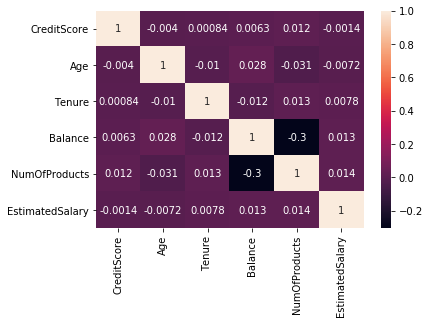

In [13]:
sns.heatmap(df.corr(),annot=True)

there is no strong correlation among variables so we can say that there is no multicollinearity

### Check of Skewness

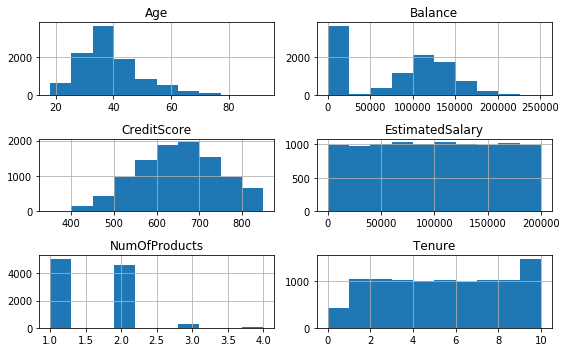

Skewness:


CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [14]:

df.hist(figsize=(8,5))

plt.tight_layout()

plt.show()  


print('Skewness:')

df.skew()

### Missing Data Analysis

In [15]:
Total = df.isnull().sum().sort_values(ascending=False)          


Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   


missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Exited,0,0.0
EstimatedSalary,0,0.0
IsActiveMember,0,0.0
HasCrCard,0,0.0
NumOfProducts,0,0.0
Balance,0,0.0
Tenure,0,0.0
Age,0,0.0
Gender,0,0.0
Geography,0,0.0


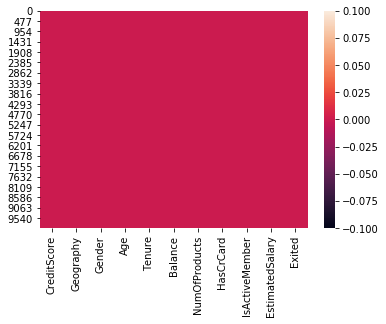

In [16]:
sns.heatmap(df.isnull())
plt.show()

Thre is no missing value in the dataset

### % Values in each categorical columns

In [17]:
print('% Values in each categorical columns')
for i in cat_df.columns:
    print('\n% value in column', i)
    print((df[i].value_counts()/len(df[i])*100))

% Values in each categorical columns

% value in column Geography
France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64

% value in column Gender
Male      54.57
Female    45.43
Name: Gender, dtype: float64

% value in column HasCrCard
1    70.55
0    29.45
Name: HasCrCard, dtype: float64

% value in column IsActiveMember
1    51.51
0    48.49
Name: IsActiveMember, dtype: float64

% value in column Exited
0    79.63
1    20.37
Name: Exited, dtype: float64


### Outlier Checking

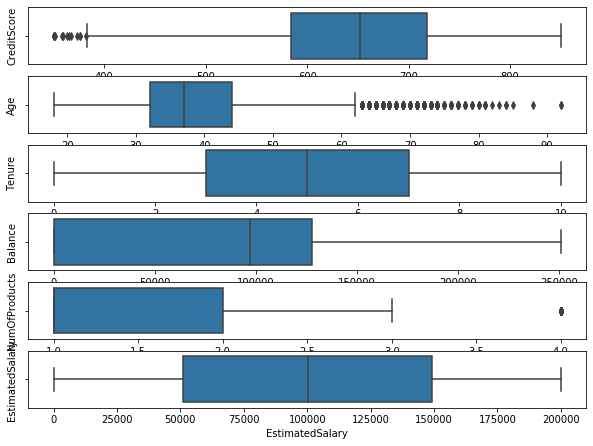

In [18]:
#outliers Checking
plt.figure(figsize=(10,20))
for i,col in enumerate(num_df,1):
    plt.subplot(16,1,i)
    sns.boxplot(df[col])
    plt.ylabel(col)
plt.show()

### Categorical Column Analysis

In [19]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

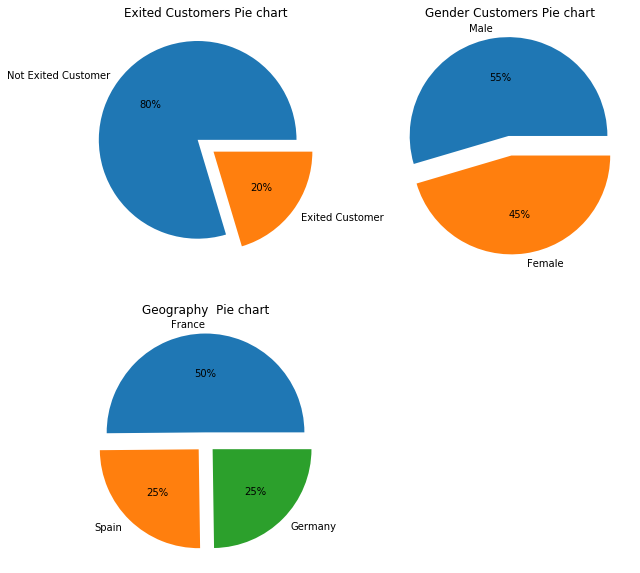

In [20]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('Exited Customers Pie chart')
explode = (0.1,0.1)
plt.pie(df['Exited'].value_counts(),labels=['Not Exited Customer','Exited Customer'],autopct='%0.f%%',explode=explode)
plt.subplot(2,2,2)
plt.title('Gender Customers Pie chart')
explode = (0.1,0.1)
plt.pie(df['Gender'].value_counts(),labels=['Male','Female'],autopct='%0.f%%',explode=explode)
plt.subplot(2,2,3)
plt.title('Geography  Pie chart')
explode = (0.1,0.1,0.1)
plt.pie(df['Geography'].value_counts(),labels=['France','Spain','Germany'],autopct='%0.f%%',explode=explode)
plt.show()


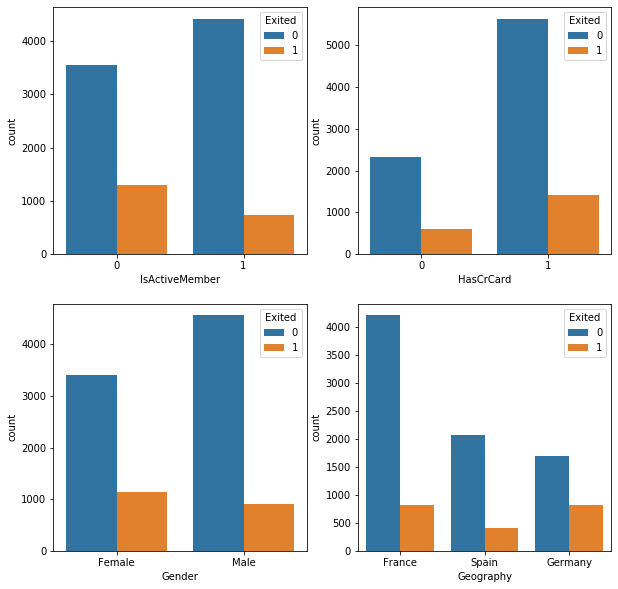

In [21]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(df['IsActiveMember'],hue=df['Exited'])
plt.subplot(2,2,2)
sns.countplot(df['HasCrCard'],hue=df['Exited'])
plt.subplot(2,2,3)
sns.countplot(df['Gender'],hue=df['Exited'])
plt.subplot(2,2,4)
sns.countplot(df['Geography'],hue=df['Exited'])
plt.show()

In [22]:
df.groupby('IsActiveMember')['Exited'].value_counts(normalize=True).unstack()

Exited,0,1
IsActiveMember,,
0,0.731491,0.268509
1,0.857309,0.142691


In [23]:
df.groupby('HasCrCard')['Exited'].value_counts(normalize=True).unstack()

Exited,0,1
HasCrCard,,
0,0.791851,0.208149
1,0.798157,0.201843


In [24]:
df.groupby('Gender')['Exited'].value_counts(normalize=True).unstack()

Exited,0,1
Gender,,
Female,0.749285,0.250715
Male,0.835441,0.164559


In [25]:
df.groupby('Geography')['Exited'].value_counts(normalize=True).unstack()

Exited,0,1
Geography,,
France,0.838452,0.161548
Germany,0.675568,0.324432
Spain,0.833266,0.166734


In [26]:
num_df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary'],
      dtype='object')

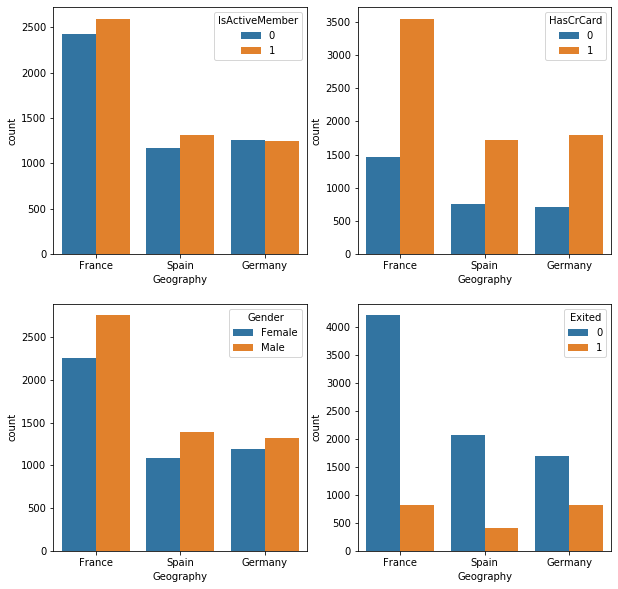

In [27]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(df['Geography'],hue=df['IsActiveMember'])
plt.subplot(2,2,2)
sns.countplot(df['Geography'],hue=df['HasCrCard'])
plt.subplot(2,2,3)
sns.countplot(df['Geography'],hue=df['Gender'])
plt.subplot(2,2,4)
sns.countplot(df['Geography'],hue=df['Exited'])
plt.show()

In [28]:
df.groupby('Geography')['IsActiveMember'].value_counts(normalize=True).unstack()

IsActiveMember,0,1
Geography,,
France,0.483247,0.516753
Germany,0.502591,0.497409
Spain,0.470327,0.529673


In [29]:
df.groupby('Geography')['HasCrCard'].value_counts(normalize=True).unstack()

HasCrCard,0,1
Geography,,
France,0.293379,0.706621
Germany,0.286170,0.713830
Spain,0.305208,0.694792


In [30]:
df.groupby('Geography')['Gender'].value_counts(normalize=True).unstack()

Gender,Female,Male
Geography,,
France,0.450937,0.549063
Germany,0.475488,0.524512
Spain,0.439645,0.560355


In [31]:
df.groupby('Geography')['Exited'].value_counts(normalize=True).unstack()

Exited,0,1
Geography,,
France,0.838452,0.161548
Germany,0.675568,0.324432
Spain,0.833266,0.166734


### Numerical Column Analysis

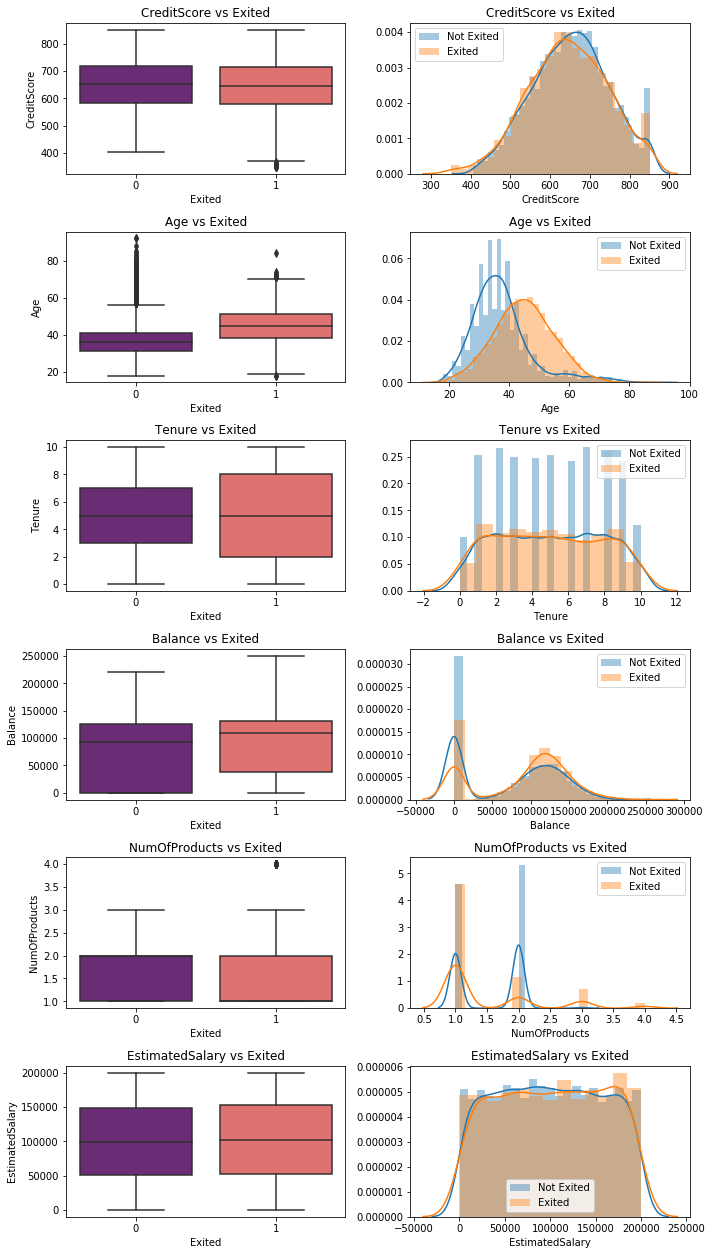

In [32]:

def plot_count(x,fig):
    
    plt.subplot(7,2,(fig))
    plt.title(x+' vs Exited')
    sns.boxplot(x=df['Exited'], y=df[x], palette=("magma"))
    plt.subplot(7,2,(fig+1))
    plt.title(x+' vs Exited')
    sns.distplot(df[x][df['Exited']==0],label='Not Exited')
    sns.distplot(df[x][df['Exited']==1],label='Exited')
    plt.legend()
    
    
plt.figure(figsize=(10,20))


m=1
for i in num_df.columns:
    plot_count(i, m)
    m+=2
    

plt.tight_layout()

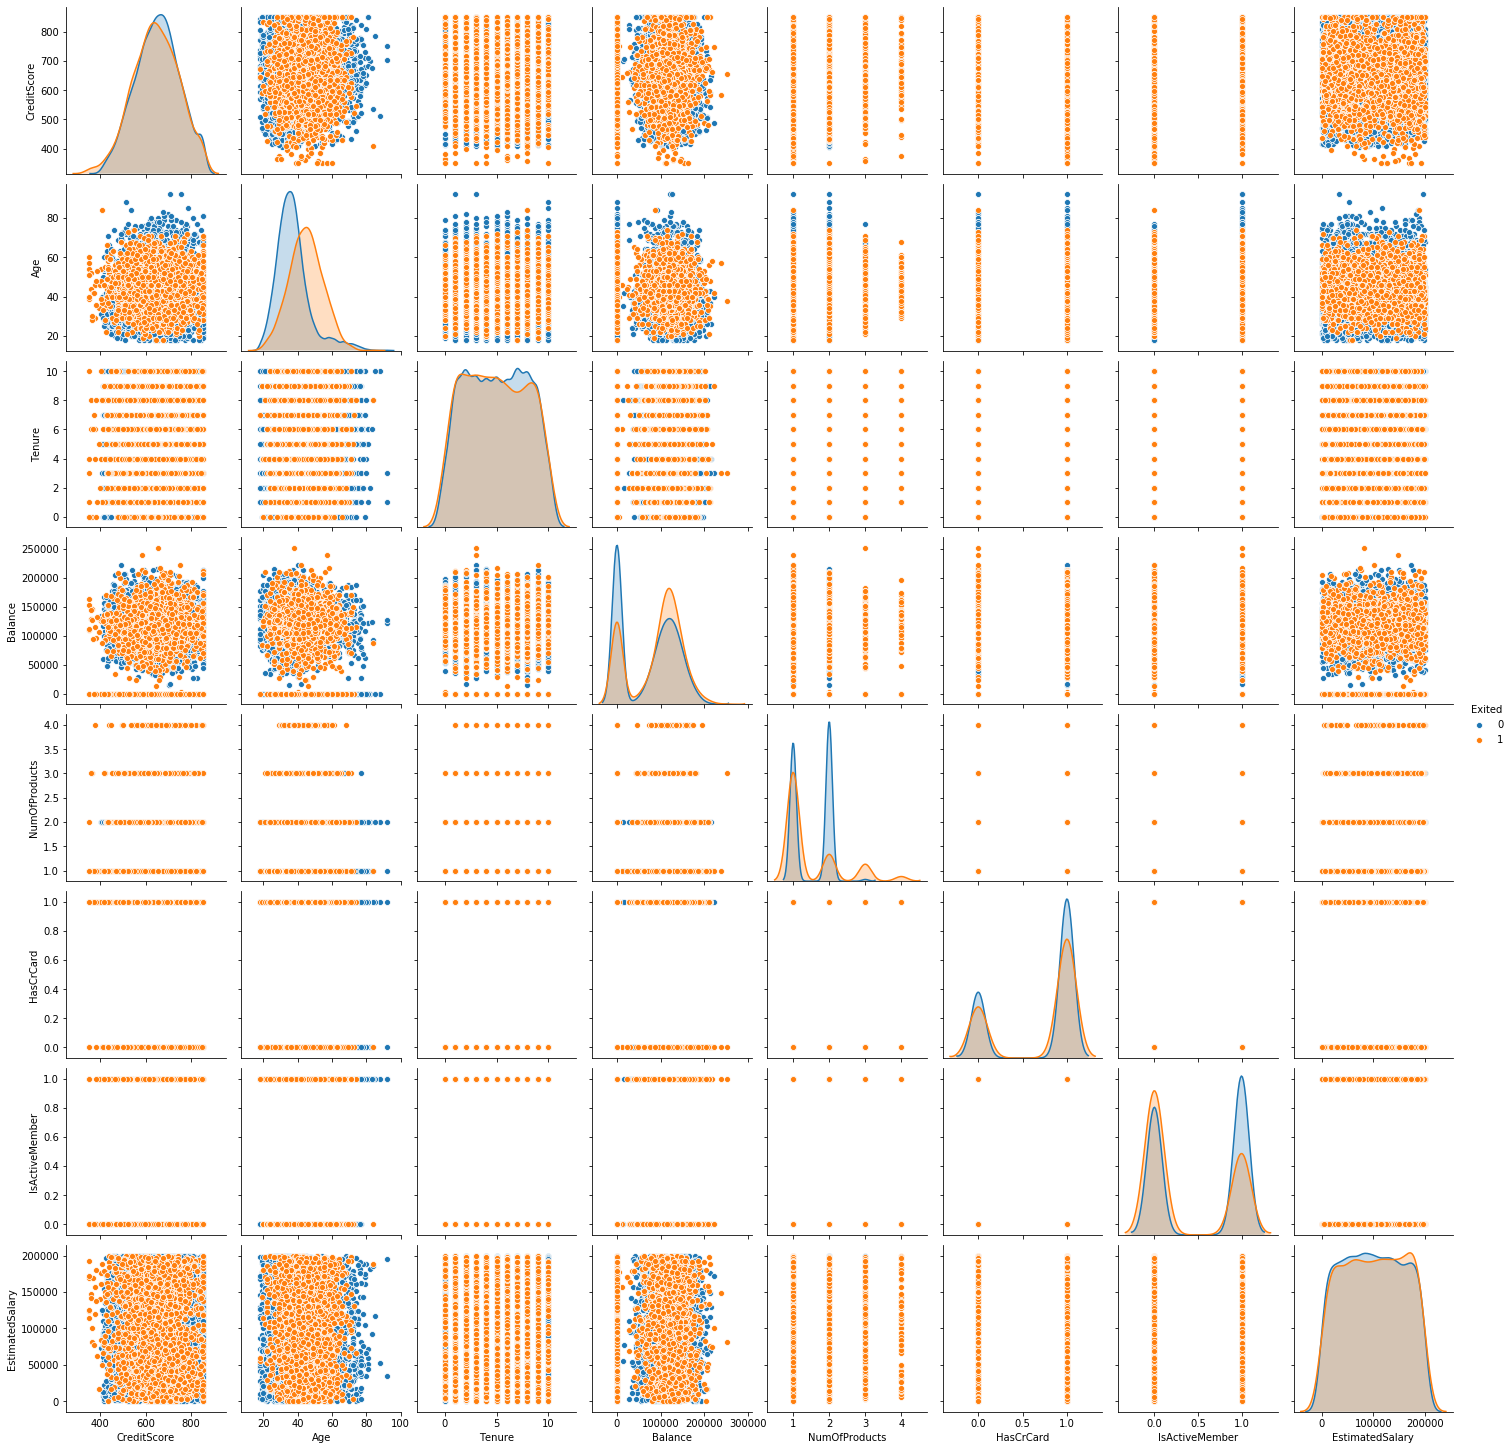

In [33]:
sns.pairplot(df,diag_kind='kde',hue='Exited')

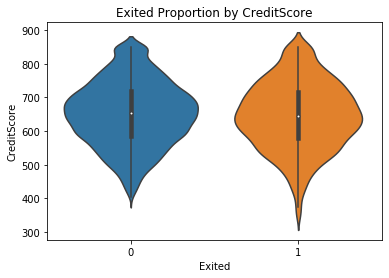

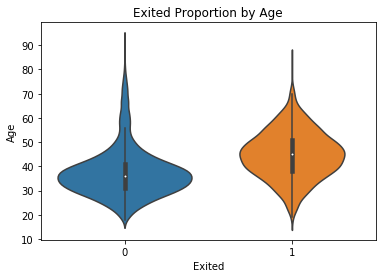

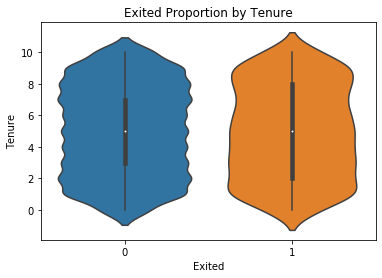

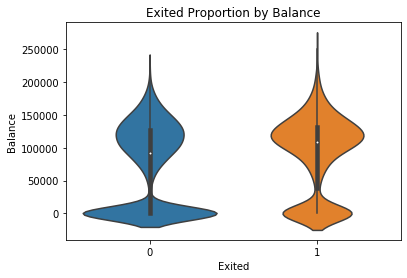

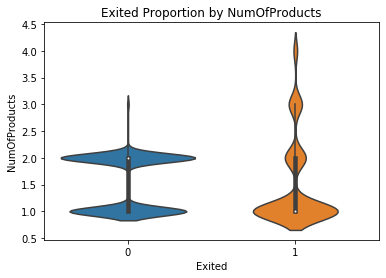

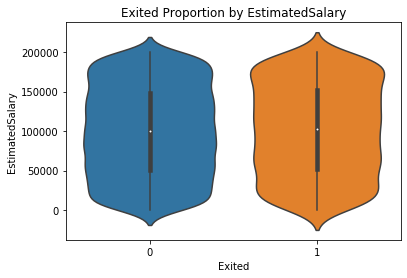

In [34]:
for i in num_df.columns:
    sns.violinplot(x = "Exited", y = i, data = df)
    plt.title('Exited Proportion by {}'.format(i))
    plt.show()

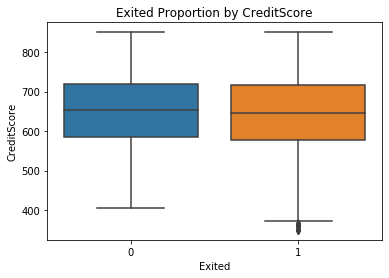

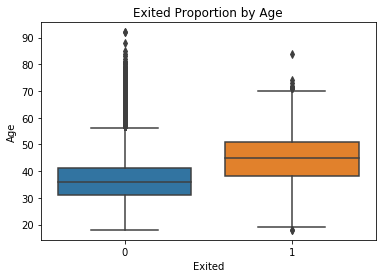

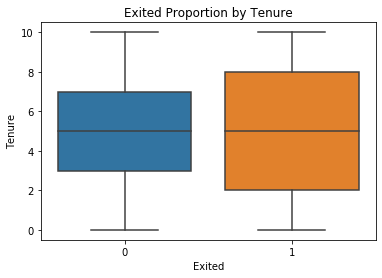

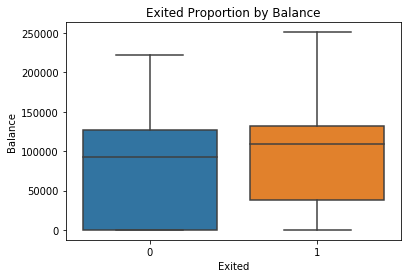

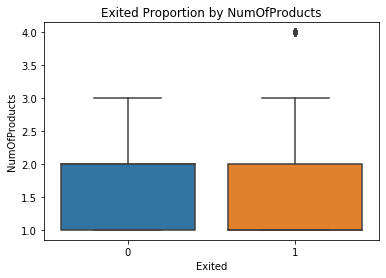

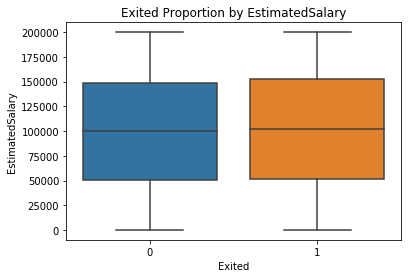

In [35]:
for i in num_df.columns:
    sns.boxplot(x = "Exited", y = i, data = df)
    plt.title('Exited Proportion by {}'.format(i))
    plt.show()

## Spliting Regionwise for better prediction

In [36]:
num_df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary'],
      dtype='object')

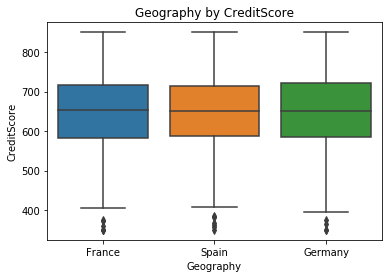

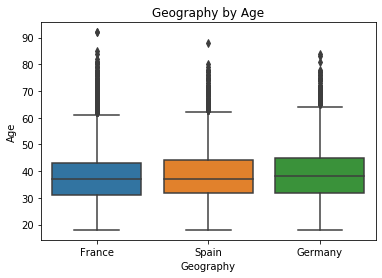

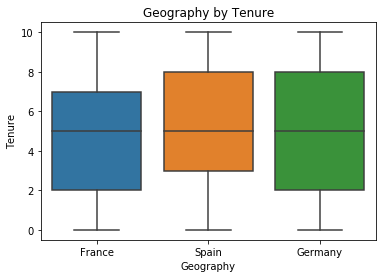

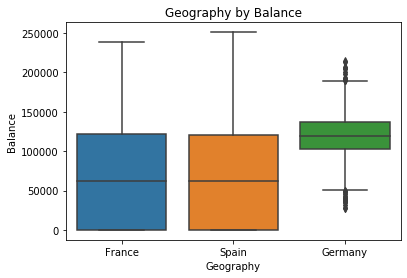

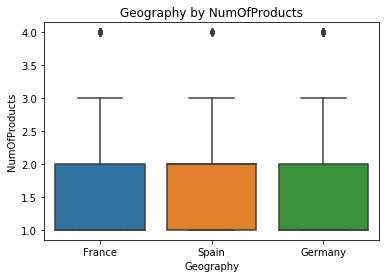

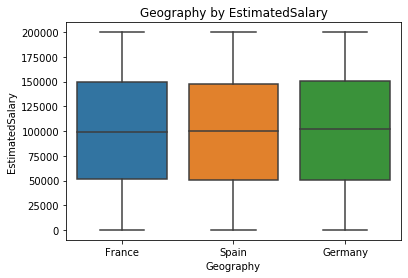

In [37]:
for i in num_df.columns:
    sns.boxplot(x = "Geography", y = i, data = df)
    plt.title('Geography by {}'.format(i))
    plt.show()

In [38]:
df_France=df[df['Geography']=='France']
df_Germany=df[df['Geography']=='Germany']
df_Spain=df[df['Geography']=='Spain']

In [39]:
df_France.shape,df_Germany.shape,df_Spain.shape

((5014, 11), (2509, 11), (2477, 11))

In [40]:
pd.crosstab(df['Exited'],df['Geography'],normalize=True)

Geography,France,Germany,Spain
Exited,,,
0,0.4204,0.1695,0.2064
1,0.0810,0.0814,0.0413


In [41]:
print('France Exited Proportion \n',df_France['Exited'].value_counts(normalize=True))
print('\n Germany Exited Proportion \n',df_Germany['Exited'].value_counts(normalize=True))
print('\n Spain Exited Proportion \n',df_Spain['Exited'].value_counts(normalize=True))

France Exited Proportion 
 0    0.838452
1    0.161548
Name: Exited, dtype: float64

 Germany Exited Proportion 
 0    0.675568
1    0.324432
Name: Exited, dtype: float64

 Spain Exited Proportion 
 0    0.833266
1    0.166734
Name: Exited, dtype: float64


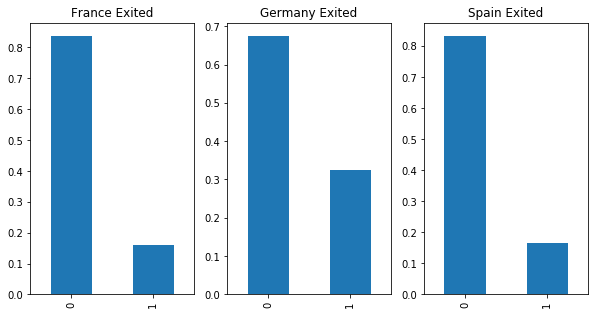

In [42]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title('France Exited')
df_France['Exited'].value_counts(normalize=True).plot(kind='bar')
plt.subplot(1,3,2)
plt.title('Germany Exited')
df_Germany['Exited'].value_counts(normalize=True).plot(kind='bar')
plt.subplot(1,3,3)
plt.title('Spain Exited')
df_Spain['Exited'].value_counts(normalize=True).plot(kind='bar')


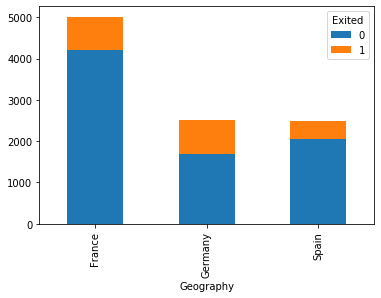

In [43]:
pd.crosstab(df['Geography'],df['Exited']).plot(kind='bar',stacked=True)

## Comparing male and Female Proportions in 3 regions

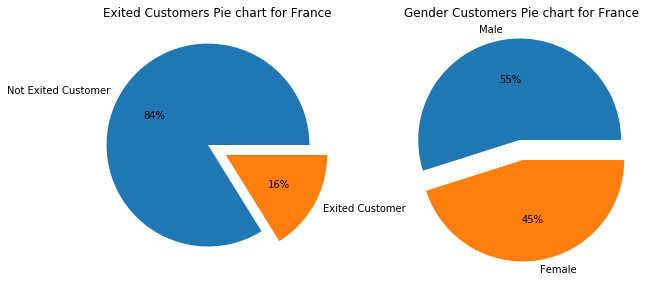

In [44]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('Exited Customers Pie chart for France')
explode = (0.1,0.1)
plt.pie(df_France['Exited'].value_counts(),labels=['Not Exited Customer','Exited Customer'],autopct='%0.f%%',explode=explode)
plt.subplot(1,2,2)
plt.title('Gender Customers Pie chart for France')
explode = (0.1,0.1)
plt.pie(df_France['Gender'].value_counts(),labels=['Male','Female'],autopct='%0.f%%',explode=explode)

plt.show()

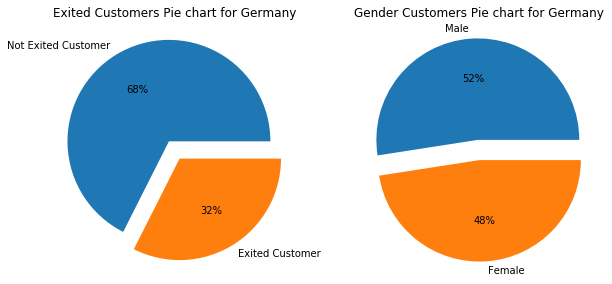

In [45]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('Exited Customers Pie chart for Germany')
explode = (0.1,0.1)
plt.pie(df_Germany['Exited'].value_counts(),labels=['Not Exited Customer','Exited Customer'],autopct='%0.f%%',explode=explode)
plt.subplot(1,2,2)
plt.title('Gender Customers Pie chart for Germany')
explode = (0.1,0.1)
plt.pie(df_Germany['Gender'].value_counts(),labels=['Male','Female'],autopct='%0.f%%',explode=explode)

plt.show()

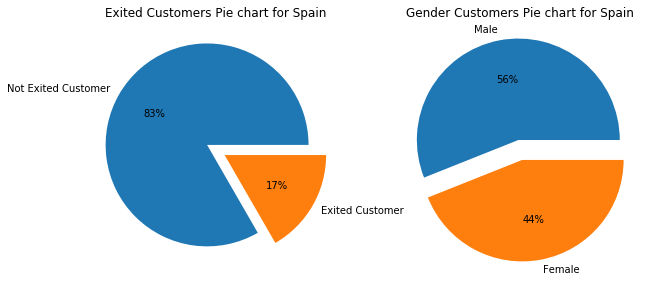

In [46]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('Exited Customers Pie chart for Spain')
explode = (0.1,0.1)
plt.pie(df_Spain['Exited'].value_counts(),labels=['Not Exited Customer','Exited Customer'],autopct='%0.f%%',explode=explode)
plt.subplot(1,2,2)
plt.title('Gender Customers Pie chart for Spain')
explode = (0.1,0.1)
plt.pie(df_Spain['Gender'].value_counts(),labels=['Male','Female'],autopct='%0.f%%',explode=explode)

plt.show()

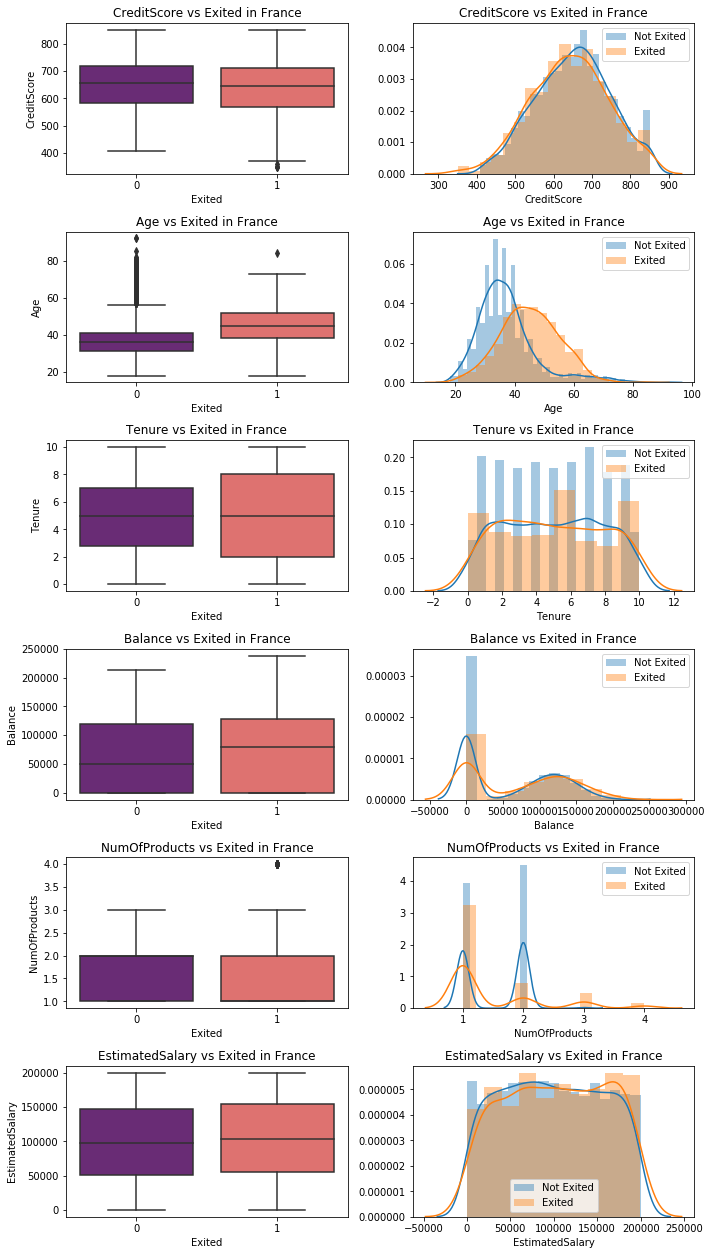

In [47]:
def plot_count(x,fig):
    
    plt.subplot(7,2,(fig))
    plt.title(x+' vs Exited in France')
    sns.boxplot(x=df_France['Exited'], y=df_France[x], palette=("magma"))
    plt.subplot(7,2,(fig+1))
    plt.title(x+' vs Exited in France')
    sns.distplot(df_France[x][df_France['Exited']==0],label='Not Exited')
    sns.distplot(df_France[x][df_France['Exited']==1],label='Exited')
    plt.legend()
    
    
plt.figure(figsize=(10,20))

m=1
for i in num_df.columns:
    plot_count(i, m)
    m+=2
    

plt.tight_layout()

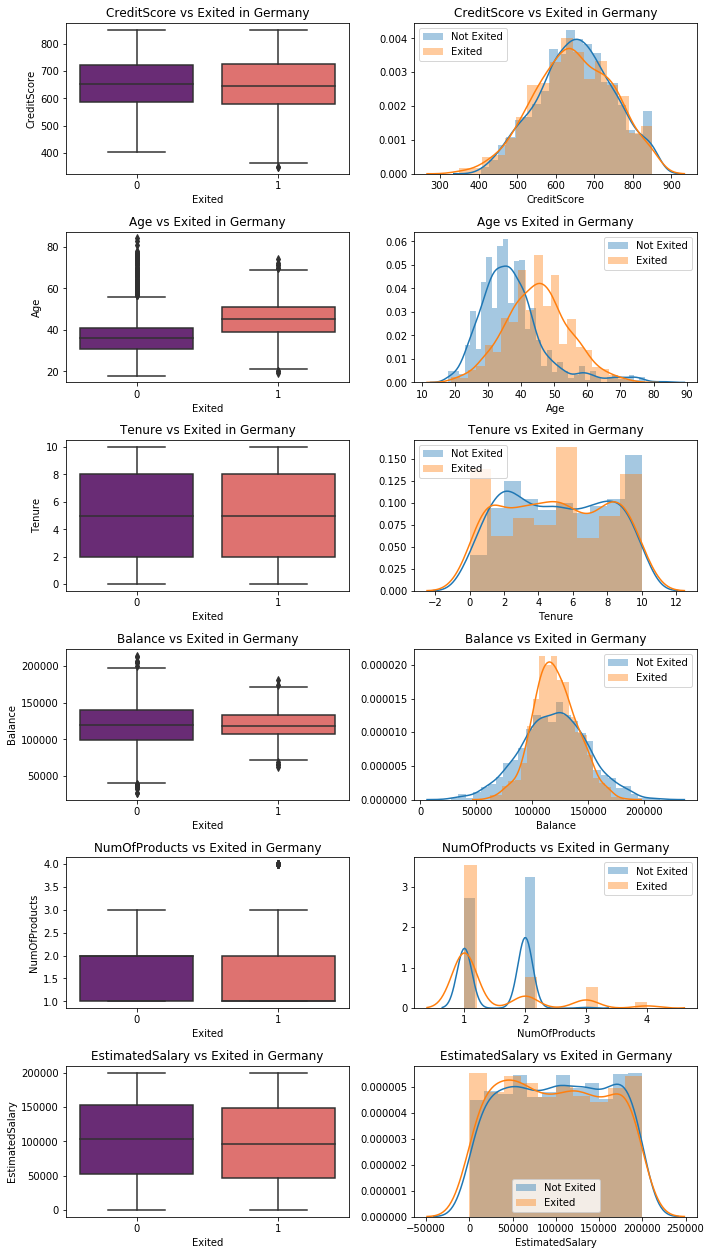

In [48]:
def plot_count(x,fig):
    
    plt.subplot(7,2,(fig))
    plt.title(x+' vs Exited in Germany')
    sns.boxplot(x=df_Germany['Exited'], y=df_Germany[x], palette=("magma"))
    plt.subplot(7,2,(fig+1))
    plt.title(x+' vs Exited in Germany')
    sns.distplot(df_Germany[x][df_Germany['Exited']==0],label='Not Exited')
    sns.distplot(df_Germany[x][df_Germany['Exited']==1],label='Exited')
    plt.legend()
    
    
plt.figure(figsize=(10,20))

m=1
for i in num_df.columns:
    plot_count(i, m)
    m+=2
    

plt.tight_layout()

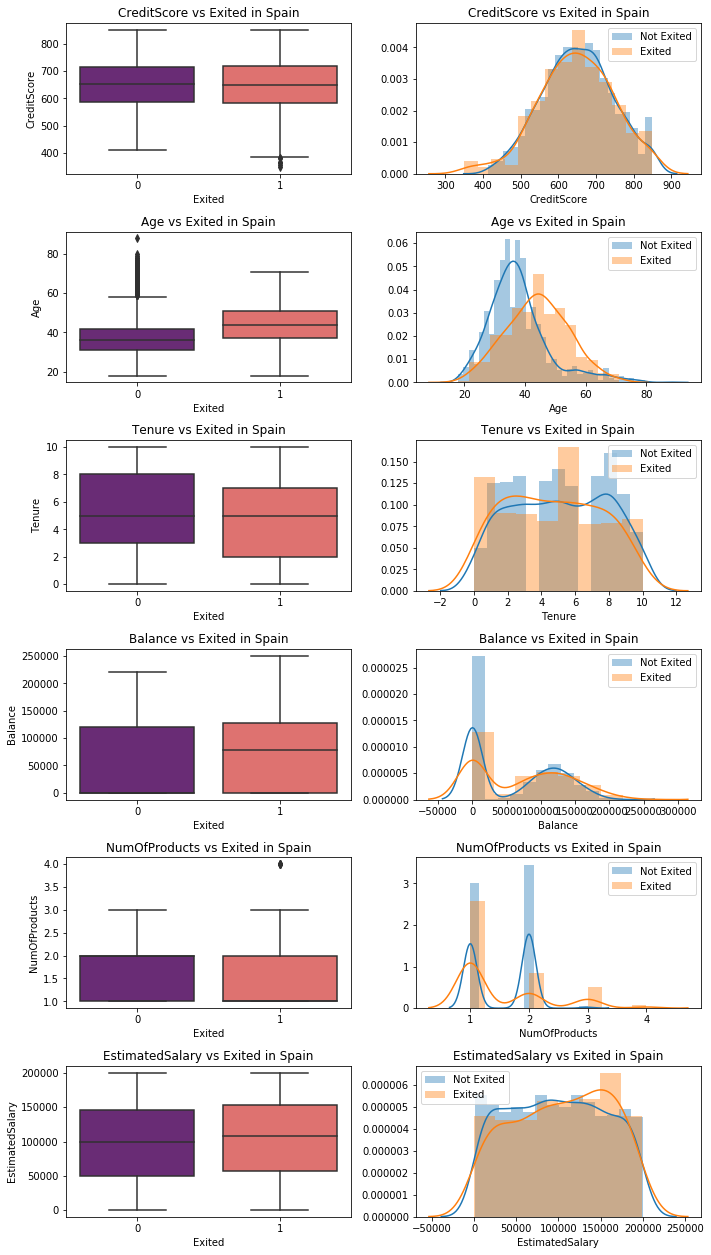

In [49]:
def plot_count(x,fig):
    
    plt.subplot(7,2,(fig))
    plt.title(x+' vs Exited in Spain')
    sns.boxplot(x=df_Spain['Exited'], y=df_Spain[x], palette=("magma"))
    plt.subplot(7,2,(fig+1))
    plt.title(x+' vs Exited in Spain')
    sns.distplot(df_Spain[x][df_Spain['Exited']==0],label='Not Exited')
    sns.distplot(df_Spain[x][df_Spain['Exited']==1],label='Exited')
    plt.legend()
    
    
plt.figure(figsize=(10,20))

m=1
for i in num_df.columns:
    plot_count(i, m)
    m+=2
    

plt.tight_layout()

# France Region

In [50]:
df[['HasCrCard','IsActiveMember','Exited']]=df[['HasCrCard','IsActiveMember','Exited']].astype(np.number)

In [51]:
df_France=df[df['Geography']=='France']
df_Germany=df[df['Geography']=='Germany']
df_Spain=df[df['Geography']=='Spain']

In [52]:
df_France.shape

(5014, 11)

In [53]:
df_France.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1.0,1.0,101348.88,1.0
2,502,France,Female,42,8,159660.80,3,1.0,0.0,113931.57,1.0
3,699,France,Female,39,1,0.00,2,0.0,0.0,93826.63,0.0
6,822,France,Male,50,7,0.00,2,1.0,1.0,10062.80,0.0
8,501,France,Male,44,4,142051.07,2,0.0,1.0,74940.50,0.0


In [54]:
df_France=df_France.drop('Geography',axis=1)

In [55]:
df_France.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5014 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      5014 non-null   int64  
 1   Gender           5014 non-null   object 
 2   Age              5014 non-null   int64  
 3   Tenure           5014 non-null   int64  
 4   Balance          5014 non-null   float64
 5   NumOfProducts    5014 non-null   int64  
 6   HasCrCard        5014 non-null   float64
 7   IsActiveMember   5014 non-null   float64
 8   EstimatedSalary  5014 non-null   float64
 9   Exited           5014 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 430.9+ KB


In [56]:
x=pd.get_dummies(df_France['Gender'],drop_first=True,prefix='Gender')
df_France['Gender_Male']=x

In [57]:
df_France=df_France.drop('Gender',axis=1)

In [58]:
df_France['Gender_Male']=df_France['Gender_Male'].astype('int')

In [59]:
df_France['Exited'].value_counts()

0.0    4204
1.0     810
Name: Exited, dtype: int64

In [60]:
y=df_France['Exited']
x=df_France.drop('Exited',axis=1)

## Checking variable importance using Machine Learning

In [84]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor()

model.fit(x, y)

importance = model.feature_importances_

imp=pd.DataFrame({'columns':x.columns,'Importance':importance})
imp=imp.sort_values(by='Importance',ascending=False)
imp

,columns,Importance
1,Age,0.207298
3,Balance,0.172684
7,EstimatedSalary,0.164892
0,CreditScore,0.162098
4,NumOfProducts,0.115658
2,Tenure,0.071105
6,IsActiveMember,0.070649
8,Gender_Male,0.021744
5,HasCrCard,0.013872


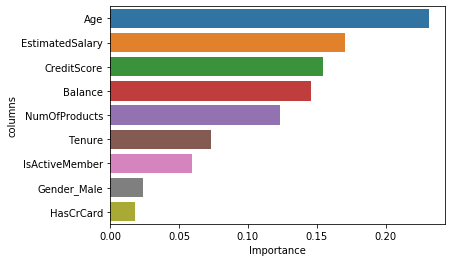

In [62]:
sns.barplot(imp['Importance'],imp['columns'])

# Germany Region

In [63]:
df_Germany.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Germany,Female,29,4,115046.74,4,1.0,0.0,119346.88,1.0
15,616,Germany,Male,45,3,143129.41,2,0.0,1.0,64327.26,0.0
16,653,Germany,Male,58,1,132602.88,1,1.0,0.0,5097.67,1.0
26,756,Germany,Male,36,2,136815.64,1,1.0,1.0,170041.95,0.0
28,574,Germany,Female,43,3,141349.43,1,1.0,1.0,100187.43,0.0


In [64]:
df_Germany.shape

(2509, 11)

In [65]:
df_Germany['Exited'].value_counts()

0.0    1695
1.0     814
Name: Exited, dtype: int64

In [66]:
df_Germany.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2509 entries, 7 to 9998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      2509 non-null   int64  
 1   Geography        2509 non-null   object 
 2   Gender           2509 non-null   object 
 3   Age              2509 non-null   int64  
 4   Tenure           2509 non-null   int64  
 5   Balance          2509 non-null   float64
 6   NumOfProducts    2509 non-null   int64  
 7   HasCrCard        2509 non-null   float64
 8   IsActiveMember   2509 non-null   float64
 9   EstimatedSalary  2509 non-null   float64
 10  Exited           2509 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 235.2+ KB


In [67]:
df_Germany=df_Germany.drop('Geography',axis=1)

In [68]:
male_german=pd.get_dummies(df_Germany['Gender'],drop_first=True,prefix='Gender')

In [69]:

df_Germany=df_Germany.drop('Gender',axis=1)

In [70]:
df_Germany['Gender_Male']=male_german

In [71]:
x=df_Germany.drop('Exited',axis=1)
y=df_Germany['Exited']

In [72]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor()

model.fit(x, y)

importance = model.feature_importances_

imp=pd.DataFrame({'columns':x.columns,'Importance':importance})
imp=imp.sort_values(by='Importance',ascending=False)
imp


,columns,Importance
1,Age,0.262252
3,Balance,0.178437
7,EstimatedSalary,0.141491
4,NumOfProducts,0.135438
0,CreditScore,0.130197
2,Tenure,0.069921
6,IsActiveMember,0.046922
8,Gender_Male,0.019250
5,HasCrCard,0.016093


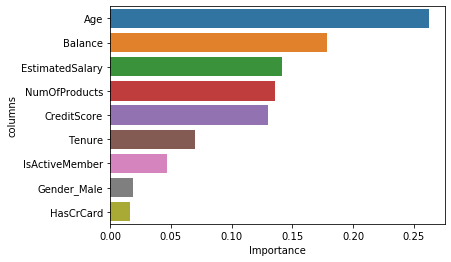

In [73]:
sns.barplot(imp['Importance'],imp['columns'])

# Spain Region

In [74]:
df_Spain.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,Spain,Female,41,1,83807.86,1,0.0,1.0,112542.58,0.0
4,850,Spain,Female,43,2,125510.82,1,1.0,1.0,79084.10,0.0
5,645,Spain,Male,44,8,113755.78,2,1.0,0.0,149756.71,1.0
11,497,Spain,Male,24,3,0.00,2,1.0,0.0,76390.01,0.0
14,635,Spain,Female,35,7,0.00,2,1.0,1.0,65951.65,0.0


In [75]:
df_Spain['Exited'].value_counts()

0.0    2064
1.0     413
Name: Exited, dtype: int64

In [76]:
df_Spain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2477 entries, 1 to 9992
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      2477 non-null   int64  
 1   Geography        2477 non-null   object 
 2   Gender           2477 non-null   object 
 3   Age              2477 non-null   int64  
 4   Tenure           2477 non-null   int64  
 5   Balance          2477 non-null   float64
 6   NumOfProducts    2477 non-null   int64  
 7   HasCrCard        2477 non-null   float64
 8   IsActiveMember   2477 non-null   float64
 9   EstimatedSalary  2477 non-null   float64
 10  Exited           2477 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 232.2+ KB


In [77]:
df_Spain=df_Spain.drop('Geography',axis=1)

In [78]:
male_spain=pd.get_dummies(df_Spain['Gender'],drop_first=True,prefix='Gender')

In [79]:
df_Spain=df_Spain.drop('Gender',axis=1)

In [80]:
df_Spain['Gender_Male']=male_spain

In [81]:
x=df_Spain.drop('Exited',axis=1)
y=df_Spain['Exited']

In [82]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor()

model.fit(x, y)

importance = model.feature_importances_

imp=pd.DataFrame({'columns':x.columns,'Importance':importance})
imp=imp.sort_values(by='Importance',ascending=False)
imp

,columns,Importance
1,Age,0.209868
3,Balance,0.169635
7,EstimatedSalary,0.163852
0,CreditScore,0.156869
4,NumOfProducts,0.115845
2,Tenure,0.074898
6,IsActiveMember,0.070697
8,Gender_Male,0.023479
5,HasCrCard,0.014857


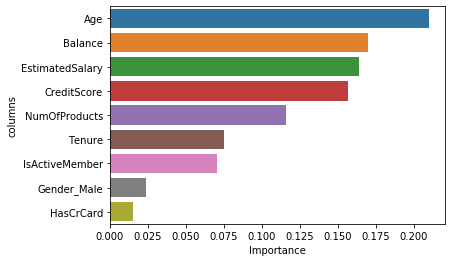

In [83]:
sns.barplot(imp['Importance'],imp['columns'])

The reasons why we chose to build different model for all three regions are:
- the Balance and Age columns are showing sigificant different wrt different regions
- the exit rate of germany is greater than that of France and Spain rather than having less customers than France
- Customer behavior at exit rate changes wrt to differnt features at differnt geographical region.